In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as colors
import matplotlib.text as text
import matplotlib.lines as lines
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [27]:
# create datapaths for files and figures
csv_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/'
png_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/'
pdf_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/lambdar_revisions/'

In [4]:
### Samples as of 2/19/19
spec = pd.read_csv(f'{csv_path}spec_lambdar_revisions_063020.csv')
mac = pd.read_csv(f'{csv_path}mac_lambdar_revisions_063020.csv')
zoo = pd.read_csv(f'{csv_path}zoo_lambdar_revisions_063020.csv')
zoo_30 = pd.read_csv(f'{csv_path}zoo_30_lambdar_revisions_063020.csv')

slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Bolton_2008_gradeA_lenses.csv')
s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/S4TM_Shu_2017_gradaA_lenses.csv')
bells = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Brownstein_BELLS_GradeA_lenses.csv')

decals_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_gama.csv')
s4tm_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
slacs_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

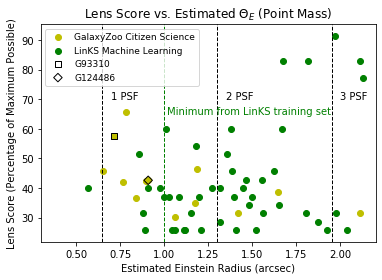

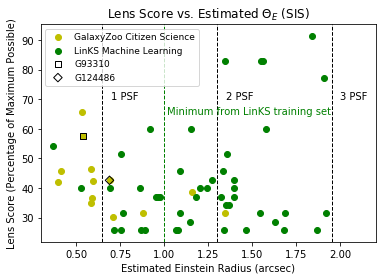

In [144]:
G136604 = zoo[zoo.GAMA_ID == 136604]
G124486 = zoo[zoo.GAMA_ID == 124486]
# zoo and mac scores with pm theta_e estimates
plt.figure()
plt.xlim(0.3, 2.2)

plt.scatter(zoo.theta_e_pm, zoo.score*100,color='y',label='GalaxyZoo Citizen Science')
plt.scatter(mac.theta_e_pm, mac.score/0.7,color='g',label='LinKS Machine Learning')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_pm, 
            zoo_30[zoo_30.GAMA_ID == 93310].score * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.scatter(G124486.theta_e_pm, G124486.score * 100,
            marker = 'D', color = 'none', edgecolor = 'k',
        label = 'G124486')

plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 70, '1 PSF')
plt.text(1.35, 70, '2 PSF')
plt.text(2, 70, '3 PSF')
plt.text(1.015, 65, 'Minimum from LinKS training set', color = 'g')
plt.title('Lens Score vs. Estimated $\Theta_E$ (Point Mass)')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (Percentage of Maximum Possible)")
plt.legend(loc='upper left', fontsize=9)

#plt.savefig(f'{pdf_path}mac_zoo_theta_e_score_pm.pdf')

# zoo and mac scores with sis theta_e estimates
plt.figure()
plt.xlim(0.3, 2.2)

plt.scatter(zoo.theta_e_sis, zoo.score*100,color='y',label='GalaxyZoo Citizen Science')
plt.scatter(mac.theta_e_sis, mac.score/0.7,color='g',label='LinKS Machine Learning')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_sis, 
            zoo_30[zoo_30.GAMA_ID == 93310].score * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.scatter(G124486.theta_e_sis, G124486.score * 100,
            marker = 'D', color = 'none', edgecolor = 'k',
        label = 'G124486')

plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 70, '1 PSF')
plt.text(1.35, 70, '2 PSF')
plt.text(2, 70, '3 PSF')
plt.text(1.015, 65, 'Minimum from LinKS training set', color = 'g')
plt.title('Lens Score vs. Estimated $\Theta_E$ (SIS)')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (Percentage of Maximum Possible)")
plt.legend(loc='upper left', fontsize=9)

#plt.savefig(f'{pdf_path}mac_zoo_theta_e_score_sis.pdf')


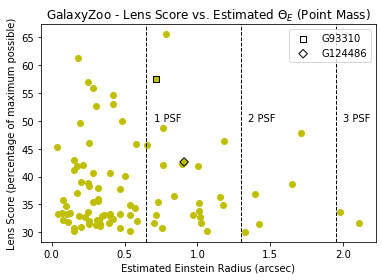

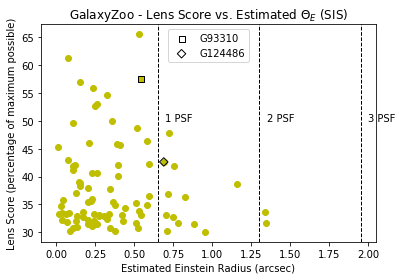

In [145]:
G136604 = zoo[zoo.GAMA_ID == 136604]
G124486 = zoo[zoo.GAMA_ID == 124486]
# zoo_30 scores PM
plt.figure()
plt.scatter(zoo_30.theta_e_pm, zoo_30.score * 100,color='Y')#,label='Zoo')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_pm, 
            zoo_30[zoo_30.GAMA_ID == 93310].score * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.scatter(G124486.theta_e_pm, G124486.score * 100,
            marker = 'D', color = 'none', edgecolor = 'k',
        label = 'G124486')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Estimated $\Theta_E$ (Point Mass)')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (percentage of maximum possible)")
plt.legend()

plt.savefig(f'{pdf_path}zoo_theta_e_score_pm.pdf')


# zoo_30 scores SIS
plt.figure()
plt.scatter(zoo_30.theta_e_sis, zoo_30.score * 100,color='Y')#,label='Zoo')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_sis, 
            zoo_30[zoo_30.GAMA_ID == 93310].score * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.scatter(G124486.theta_e_sis, G124486.score * 100,
            marker = 'D', color = 'none', edgecolor = 'k',
        label = 'G124486')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Estimated $\Theta_E$ (SIS)')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (percentage of maximum possible)")
plt.legend()

plt.savefig(f'{pdf_path}zoo_theta_e_score_sis.pdf')


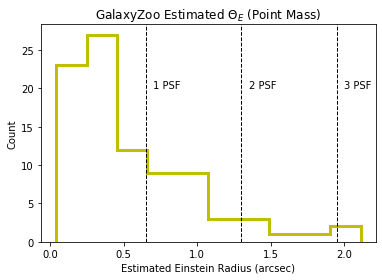

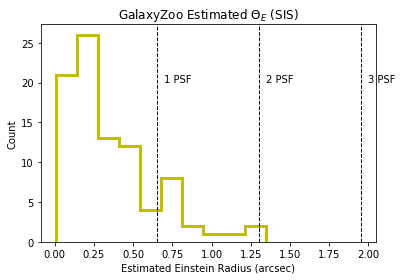

In [31]:
# Histogram of GalaxyZoo Einstein Radii

# PM
plt.figure()
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("GalaxyZoo Estimated $\Theta_E$ (Point Mass)")
plt.hist(zoo_30.theta_e_pm,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
#plt.hist(s4tm_shu_17.theta_e_sie,bins=10,color='c',label='S4TM', histtype = 'step', linewidth=3)
#plt.hist(bells_brownstein_12.theta_e_sie,bins=10,color='k',label='BELLS', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
#plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.text(0.7, 20, '1 PSF')
plt.text(1.35, 20, '2 PSF')
plt.text(2, 20, '3 PSF')

#plt.savefig(f'{pdf_path}zoo_theta_e_pm_hist.pdf')

# SIS
plt.figure()
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("GalaxyZoo Estimated $\Theta_E$ (SIS)")
plt.hist(zoo_30.theta_e_sis,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
#plt.hist(s4tm_shu_17.theta_e_sie,bins=10,color='c',label='S4TM', histtype = 'step', linewidth=3)
#plt.hist(bells_brownstein_12.theta_e_sie,bins=10,color='k',label='BELLS', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
#plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.text(0.7, 20, '1 PSF')
plt.text(1.35, 20, '2 PSF')
plt.text(2, 20, '3 PSF')

#plt.savefig(f'{pdf_path}zoo_theta_e_sis_hist.pdf')


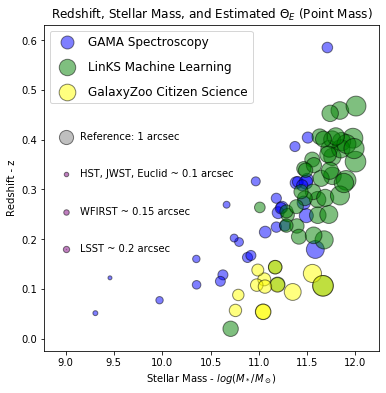

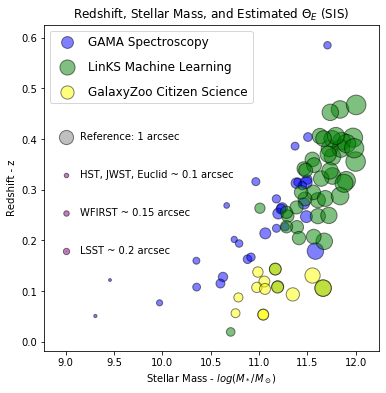

In [32]:
# big plot with einstein radii
# PM
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = spec.lambdar_log_mstar
y1 = spec.z_lens
c = spec.theta_e_pm
v1 = spec.theta_e_pm*200

x2 = mac.lambdar_log_mstar
y2 = mac.z
v2 = mac.theta_e_pm*200

x3 = zoo.lambdar_log_mstar
y3 = zoo.z
v3 = zoo.theta_e_pm*200

jwst = 0.1*200
lsst = 0.2*200
wfirst = 0.15*200
hst = 0.05

ax.scatter(x1, y1, s=v1, color='blue', marker='o', edgecolors = "k", label='GAMA Spectroscopy', alpha = 0.5)#, fillstyle = 'none')
ax.scatter(x2, y2, s=v2, color='green', marker='o', edgecolors = "k", label='LinKS Machine Learning', alpha = 0.5)
ax.scatter(x3, y3, s=v3, color='yellow', marker='o', edgecolors = "k", label='GalaxyZoo Citizen Science', alpha = 0.5)

ax.scatter(9., 0.405, s=200, color='gray', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.330, s=jwst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.255, s=wfirst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.180, s=lsst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.180, s=hst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)

plt.legend(loc='upper left', labelspacing=1.0, fontsize = 12)
#plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4], spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Einstein Radius - arcsec', fontsize=10)
plt.text(9.15,0.400,'Reference: 1 arcsec')
plt.text(9.15,0.325,'HST, JWST, Euclid ~ 0.1 arcsec')
plt.text(9.15,0.250,'WFIRST ~ 0.15 arcsec')
plt.text(9.15,0.175,'LSST ~ 0.2 arcsec')
plt.text


plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - z")
plt.title("Redshift, Stellar Mass, and Estimated $\Theta_E$ (Point Mass)")

#plt.savefig(f'{pdf_path}big_plot_theta_e_pm.pdf')

# big plot with einstein radii
# SIS
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = spec.lambdar_log_mstar
y1 = spec.z_lens
c = spec.theta_e_sis
v1 = spec.theta_e_sis*200

x2 = mac.lambdar_log_mstar
y2 = mac.z
v2 = mac.theta_e_sis*200

x3 = zoo.lambdar_log_mstar
y3 = zoo.z
v3 = zoo.theta_e_sis*200

jwst = 0.1*200
lsst = 0.2*200
wfirst = 0.15*200
hst = 0.05

ax.scatter(x1, y1, s=v1, color='blue', marker='o', edgecolors = "k", label='GAMA Spectroscopy', alpha = 0.5)#, fillstyle = 'none')
ax.scatter(x2, y2, s=v2, color='green', marker='o', edgecolors = "k", label='LinKS Machine Learning', alpha = 0.5)
ax.scatter(x3, y3, s=v3, color='yellow', marker='o', edgecolors = "k", label='GalaxyZoo Citizen Science', alpha = 0.5)

ax.scatter(9., 0.405, s=200, color='gray', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.330, s=jwst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.255, s=wfirst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.180, s=lsst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.180, s=hst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)

plt.legend(loc='upper left', labelspacing=1.0, fontsize = 12)
#plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4], spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Einstein Radius - arcsec', fontsize=10)
plt.text(9.15,0.400,'Reference: 1 arcsec')
plt.text(9.15,0.325,'HST, JWST, Euclid ~ 0.1 arcsec')
plt.text(9.15,0.250,'WFIRST ~ 0.15 arcsec')
plt.text(9.15,0.175,'LSST ~ 0.2 arcsec')
plt.text

plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - z")
plt.title("Redshift, Stellar Mass, and Estimated $\Theta_E$ (SIS)")

#plt.savefig(f'{pdf_path}big_plot_theta_e_sis.pdf')

In [84]:
zoo.lambdar_log_mstar.mean()

11.127127576923076

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

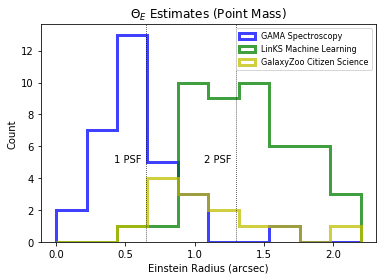

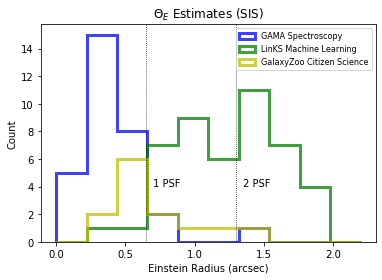

In [61]:
# Histogram of Einstein Radii
# PM
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (Point Mass)")
plt.hist(spec.theta_e_pm,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(mac.theta_e_pm,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(zoo.theta_e_pm,bins=10,range=[0.0,2.2],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=3, alpha=0.75)

#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.42, 5, '1 PSF')
plt.text(1.07, 5, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_pm_hist.pdf')

# Histogram of Einstein Radii
# SIS
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (SIS)")

plt.hist(spec.theta_e_sis,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(mac.theta_e_sis,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(zoo.theta_e_sis,bins=10,range=[0.0,2.2],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=3, alpha=0.75)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 4, '1 PSF')
plt.text(1.35, 4, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_sis_hist.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

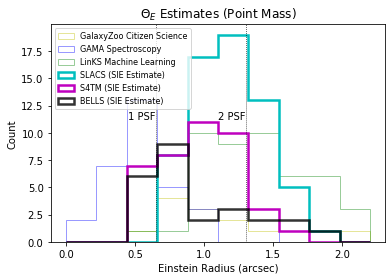

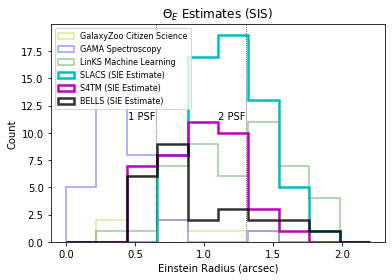

In [39]:
# Histogram of Einstein Radii with Other surveys
# PM
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (Point Mass)")
plt.hist(zoo.theta_e_pm,bins=10,range=[0.0,2.2]
         ,color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step',
        linewidth=1, alpha=0.4)
plt.hist(spec.theta_e_pm,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(mac.theta_e_pm,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=1, alpha=0.4)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
plt.hist(slacs.theta_e_sie,bins=10,range=[0.0,2.2],color='c',label='SLACS (SIE Estimate)', histtype = 'step', linewidth=2.5)
plt.hist(s4tm.theta_e_sie,bins=10,range=[0.0,2.2],color='m',label='S4TM (SIE Estimate)', histtype = 'step', linewidth=2.5)
plt.hist(bells.theta_e_sie,bins=10,range=[0.0,2.2],color='k',label='BELLS (SIE Estimate)', histtype = 'step', linewidth=2.5, alpha = 0.8)
#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.45, 11.25, '1 PSF')
plt.text(1.10, 11.25, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper left', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_pm_other_surveys_hist.pdf')

# Histogram of Einstein Radii
# SIS
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (SIS)")
plt.hist(zoo.theta_e_sis,bins=10,range=[0.0,2.2],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=1.5, alpha=0.4)
plt.hist(spec.theta_e_sis,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=1.5, alpha=0.4)
plt.hist(mac.theta_e_sis,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=1.5, alpha=0.4)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
plt.hist(slacs.theta_e_sie,bins=10,range=[0.0,2.2],color='c',label='SLACS (SIE Estimate)', histtype = 'step', linewidth=2.5)
plt.hist(s4tm.theta_e_sie,bins=10,range=[0.0,2.2],color='m',label='S4TM (SIE Estimate)', histtype = 'step', linewidth=2.5)
plt.hist(bells.theta_e_sie,bins=10,range=[0.0,2.2],color='k',label='BELLS (SIE Estimate)', histtype = 'step', linewidth=2.5, alpha = 0.8)
#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.45, 11.25, '1 PSF')
plt.text(1.10, 11.25, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper left', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_sis_other_surveys_hist.pdf')

# I need to redo matches of other surveys to Lambdar catalog.

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


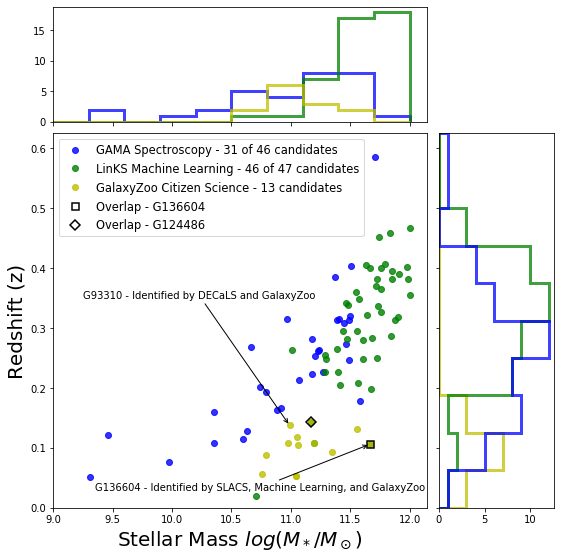

In [86]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
#axScatter.set_xlim((min(zoo.lambdar_log_mstar)-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 
               'bo', alpha = 0.8, label='GAMA Spectroscopy - 31 of 46 candidates')
axScatter.plot(mac.lambdar_log_mstar, mac.z, 
               'go', alpha = 0.8, label='LinKS Machine Learning - 46 of 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 
               'yo', alpha = 0.8, label='GalaxyZoo Citizen Science - 13 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 
#               'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 
#               'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 
#               'ms',label='S4TM - 1 candidate', fillstyle = 'none')

G93310 = zoo[zoo.GAMA_ID == 93310]
#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
            xy=(G93310.lambdar_log_mstar,G93310.z), xycoords='data',
            xytext=(9.25,0.35), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
            )

axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
            xy=(G136604.lambdar_log_mstar,G136604.z), xycoords='data',
            xytext=(9.35,0.0285), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(G136604.lambdar_log_mstar, G136604.z, 
               'ks', label='Overlap - G136604', 
               markersize=7, markeredgewidth=1.5, fillstyle = 'none')
axScatter.plot(G124486.lambdar_log_mstar, G124486.z, 
               'kD', label='Overlap - G124486', 
               markersize=7, markeredgewidth=1.5, fillstyle = 'none')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 11.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None)

#axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:

#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig(f'{pdf_path}big_plot_overlaps.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


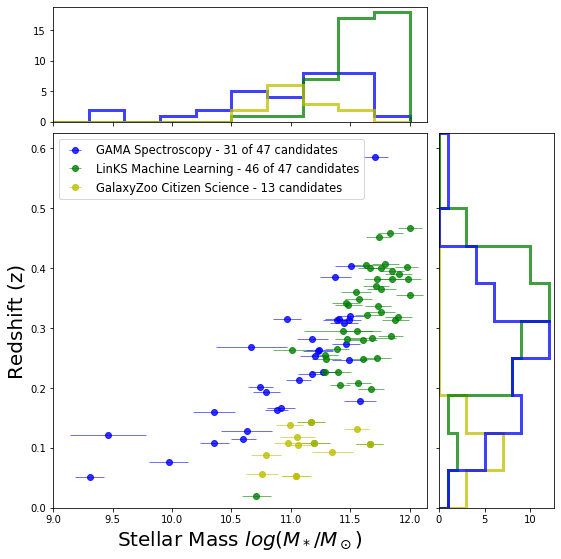

In [88]:
# big plot with error bars and overlaps

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
#axScatter.set_xlim((min(zoo.lambdar_log_mstar)-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.errorbar(spec.lambdar_log_mstar, spec.z_lens, 
               alpha = 0.8, label='GAMA Spectroscopy - 31 of 47 candidates',
                   xerr=spec.lambdar_log_mstar_error, elinewidth=0.7,
                   fmt='o', color = 'b')
axScatter.errorbar(mac.lambdar_log_mstar, mac.z, 
               alpha = 0.8, label='LinKS Machine Learning - 46 of 47 candidates',
                   xerr=mac.lambdar_log_mstar_error, elinewidth=0.7,
                   fmt='o', color = 'g')
axScatter.errorbar(zoo.lambdar_log_mstar, zoo.z, 
               alpha = 0.8, label='GalaxyZoo Citizen Science - 13 candidates',
                   xerr=zoo.lambdar_log_mstar_error, elinewidth=0.7,
                   fmt='o', color = 'y')

#G136604 = mac[mac.GAMA_ID == 136604]
#G124486 = mac[mac.GAMA_ID == 124486]
#axScatter.plot(G136604.lambdar_log_mstar, G136604.z, 
#               'ks', label='Overlap - G136604', 
#               markersize=7, markeredgewidth=2, fillstyle = 'none')
#axScatter.plot(G124486.lambdar_log_mstar, G124486.z, 
#               'kD', label='Overlap - G124486', 
#               markersize=7, markeredgewidth=2, fillstyle = 'none')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 11.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None)

#axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig(f'{pdf_path}big_plot_errorbars.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


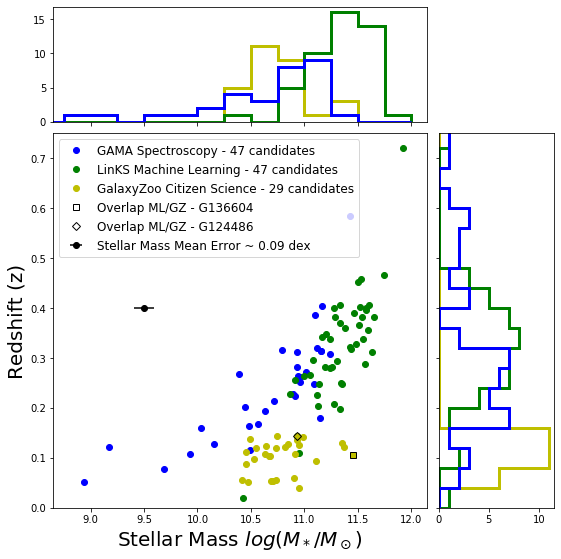

In [15]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo',label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go',label='LinKS Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo',label='GalaxyZoo Citizen Science - 29 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

# plot two overlaps
G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(np.log10(G136604.STELLAR_MASS), G136604.Z, 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
axScatter.plot(np.log10(G124486.STELLAR_MASS), G124486.Z, 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
axScatter.errorbar(9.5, 0.4,  
                   xerr= 0.09,
                  fmt = 'o',
                   color = 'black',
                   solid_capstyle = 'round',
                  label = 'Stellar Mass Mean Error ~ 0.09 dex')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(zoo.STELLAR_MASS)-0.5, max(zoo.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.65], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.65], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.65],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_overlaps_060920..pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


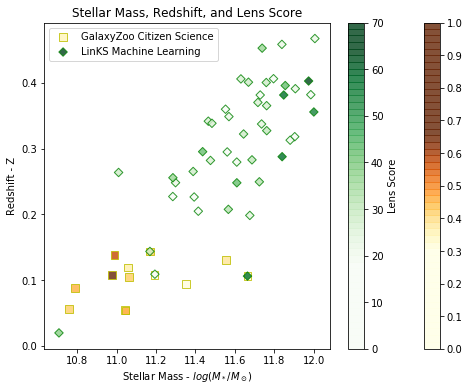

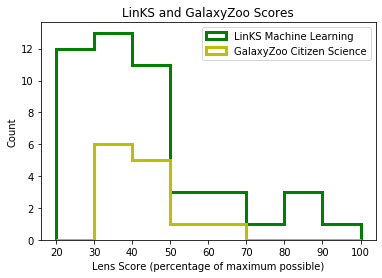

In [59]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
p2 = ax2.scatter(zoo.lambdar_log_mstar, 
                  zoo.z, 
                  c = zoo.score, 
                  cmap = "YlOrBr", 
                  edgecolors = "y",
                alpha = 0.8,
                 marker='s',
                 s=60,
                label='GalaxyZoo Citizen Science')
p1 = ax1.scatter(mac.lambdar_log_mstar, 
                mac.z, 
                c = mac.score, 
                cmap = "Greens", 
                edgecolors = 'g',
                alpha = 0.8,
                 marker='D',
                label='LinKS Machine Learning')

plt.cbar = plt.colorbar(p2,
                        shrink=1,
                        orientation='vertical',
                       boundaries=(np.linspace(0, 1, 50)),
                       ticks = ([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])) #, anchor=(0,1.5))
plt.cbar = plt.colorbar(p1, 
                        shrink=1, 
                        orientation='vertical',
                       boundaries=(np.linspace(0, 70, 50)),
                       ticks = ([0, 10, 20, 30, 40, 50, 60, 70])) #, anchor=(0,1.5)
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass, Redshift, and Lens Score")
plt.savefig(f'{png_path}mac_zoo_scores_mass_redshift.png')
plt.legend()

plt.legend()
#plt.savefig(f'{pdf_path}mac_zoo_scores_mass_redshift.pdf')


# LinKS and GZ scores
plt.figure()
plt.xlabel("Lens Score (percentage of maximum possible)")
plt.ylabel("Count")
plt.title("LinKS and GalaxyZoo Scores")
plt.hist(mac.score/.7,bins=8,range=[20, 100],color='g',
         label='LinKS Machine Learning', 
         histtype = 'step', linewidth=3, alpha=1.0)
plt.hist(zoo.score*100,bins=8,range=[20, 100],color='y',
         label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=3, alpha=1.0)
plt.legend()

#plt.savefig(f'{pdf_path}mac_zoo_scores_hist.pdf')


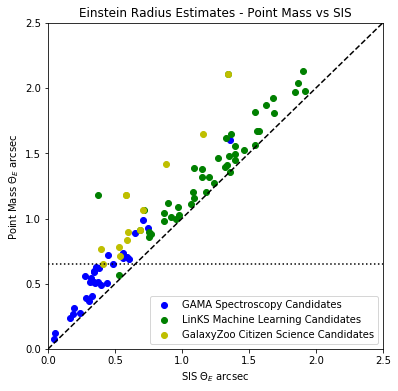

In [44]:
 # plot stellar mass by sfh for lambdar and magphys
x = np.linspace(0, 12, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.theta_e_sis,
            spec.theta_e_pm,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.theta_e_sis,
            mac.theta_e_pm,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.theta_e_sis,
            zoo.theta_e_pm,
           label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('SIS $\Theta_E$ arcsec')
ax.set_ylabel('Point Mass $\Theta_E$ arcsec')
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 2.5)
ax.plot(x, x, 
        color='k',
       linestyle='--')
ax.axhline(0.65,
        linestyle = ':',
          color='k')
ax.legend()
plt.title('Einstein Radius Estimates - Point Mass vs SIS')

#plt.savefig(f'{png_path}/theta_e_point_mass_vs_sis.png')
#plt.savefig(f'{pdf_path}theta_e_point_mass_vs_sis.pdf')

In [86]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
#hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
#hdul.verify('fix')
#magphys = hdul[1].data  # assume the first extension is a table
#print(magphys.columns)
#gamaid = magphys.CATAID # Select wanted columns
#mass = magphys.mass_stellar_best_fit
#z = magphys.Z

#gama_list = list(zip(gamaid,mass,z)) # zip to list

#gama_mass = pd.DataFrame(gama_list, columns = ['GAMA_ID','STELLAR_MASS','Z']) # create DF


In [18]:
# Point Mass
M_stellar = np.linspace(10**(9.5), 10**(12), 1000)
#print(M_stellar)
M = 0.0011 * (M_stellar) ** (1.25)
#print(M)
M_prime_1_2 = 1 / (2*10**(8.09)) * M
M_prime_3_2 = 1 / (3*10**(8.09)) * M
M_prime_5_2 = 1 / ((5/3) * 10**(8.09)) * M
M_prime_4_3 = 1 / (4 * 10**(8.09)) * M
M_prime_5_4 = 1 / (5 * 10** (8.09)) * M

#print(M_prime)
z_1_2 = np.zeros(len(M))
z_3_2 = np.zeros(len(M))
z_5_2 = np.zeros(len(M))
z_4_3 = np.zeros(len(M))
z_5_4 = np.zeros(len(M))

for i in range(len(M)):
    z_1_2[i] = z_at_value(cosmo.angular_diameter_distance, 
                          M_prime_1_2[i] * u.Mpc, zmax = 2.0)
    z_3_2[i] = z_at_value(cosmo.angular_diameter_distance, 
                          M_prime_3_2[i] * u.Mpc, zmax = 2.0)
    z_5_2[i] = z_at_value(cosmo.angular_diameter_distance, 
                          M_prime_5_2[i] * u.Mpc, zmax = 2.0)
    z_4_3[i] = z_at_value(cosmo.angular_diameter_distance, 
                          M_prime_4_3[i] * u.Mpc, zmax = 2.0)
    z_5_4[i] = z_at_value(cosmo.angular_diameter_distance, 
                          M_prime_5_4[i] * u.Mpc, zmax = 2.0)

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/cosmology/funcs.py:124: UserWarning: fval is not bracketed by func(zmin) and func(zmax). This means either
there is no solution, or that there is more than one solution between
zmin and zmax satisfying fval = func(z).
  zmin and zmax satisfying fval = func(z).""")


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


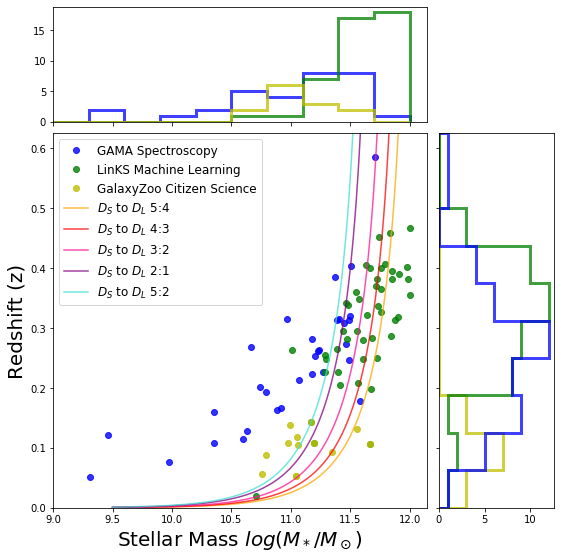

In [90]:
# PM fiber radius mass   
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(spec.lambdar_log_mstar)-0.5, max(mac.lambdar_log_mstar)+0.5))
axScatter.set_ylim((min(mac.z)-0.05, max(mac.z)+0.05))


axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(mac.lambdar_log_mstar, mac.z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

axScatter.plot(np.log10(M_stellar), z_5_4, 
               color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_4_3, 
               color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_3_2, 
               color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_1_2, 
               color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_5_2, 
               color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig(f'{png_path}fiber_radius_mass_point_mass.png')
#plt.savefig(f'{pdf_path}fiber_radius_mass_point_mass.pdf')

In [20]:
# SIS
DS_DL = pd.DataFrame([5/4, 4/3, 3/2, 2/1, 5/2])

z_low = np.linspace(0, 0.2, 100)
z_high = np.linspace(0.2, 0.8, 100)

#ratio = 1/(1-(DS_DL)**(-1)) # = DS/(DSL)
M_low_values = 8.52*10**(10) * (1-1/(DS_DL)) ** (-1/0.586)
M_high_values = 9.26*10**(10) * (1-1/(DS_DL)) ** (-1/0.562)

M_low_5_4 = pd.DataFrame(np.zeros(100))
M_low_5_4[0] = M_low_values[0][0]
M_low_4_3 = pd.DataFrame(np.zeros(100))
M_low_4_3[0] = M_low_values[0][1]
M_low_3_2 = pd.DataFrame(np.zeros(100))
M_low_3_2[0] = M_low_values[0][2]
M_low_2_1 = pd.DataFrame(np.zeros(100))
M_low_2_1[0] = M_low_values[0][3]
M_low_5_2 = pd.DataFrame(np.zeros(100))
M_low_5_2[0] = M_low_values[0][4]

M_high_5_4 = pd.DataFrame(np.zeros(100))
M_high_5_4[0] = M_high_values[0][0]
M_high_4_3 = pd.DataFrame(np.zeros(100))
M_high_4_3[0] = M_high_values[0][1]
M_high_3_2 = pd.DataFrame(np.zeros(100))
M_high_3_2[0] = M_high_values[0][2]
M_high_2_1 = pd.DataFrame(np.zeros(100))
M_high_2_1[0] = M_high_values[0][3]
M_high_5_2 = pd.DataFrame(np.zeros(100))
M_high_5_2[0] = M_high_values[0][4] 

# horizontal line to link the two vertical lines
x_5_4 = np.linspace(M_low_5_4[0][0], M_high_5_4[0][0], 100)
x_4_3 = np.linspace(M_low_4_3[0][0], M_high_4_3[0][0], 100)
x_3_2 = np.linspace(M_low_3_2[0][0], M_high_3_2[0][0], 100)
x_2_1 = np.linspace(M_low_2_1[0][0], M_high_2_1[0][0], 100)
x_5_2 = np.linspace(M_low_5_2[0][0], M_high_5_2[0][0], 100)

z_threshold = pd.DataFrame(np.zeros(100))
z_threshold[0] = 0.2


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


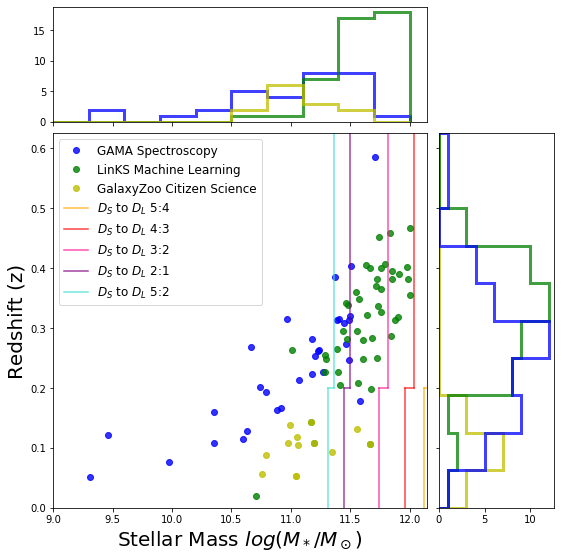

In [92]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(spec.lambdar_log_mstar)-0.5, max(mac.lambdar_log_mstar)+0.5))
axScatter.set_ylim((min(mac.z)-0.05, max(mac.z)+0.05))


axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(mac.lambdar_log_mstar, mac.z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')


# Fiber radius  masses at low and high redshifts
axScatter.plot(np.log10(M_low_5_4), z_low,
              color = 'orange', alpha = 0.75, label = '$D_S$ to $D_L$ 5:4')
axScatter.plot(np.log10(M_low_4_3), z_low,
              color = 'red', alpha = 0.75, label = '$D_S$ to $D_L$ 4:3')
axScatter.plot(np.log10(M_low_3_2), z_low,
              color = 'deeppink', alpha = 0.75, label = '$D_S$ to $D_L$ 3:2')
axScatter.plot(np.log10(M_low_2_1), z_low,
               color = 'purple', alpha = 0.75, label = '$D_S$ to $D_L$ 2:1')
axScatter.plot(np.log10(M_low_5_2), z_low,
              color = 'turquoise', alpha = 0.75, label = '$D_S$ to $D_L$ 5:2')
axScatter.plot(np.log10(M_high_5_4), z_high,
              color = 'orange', alpha = 0.75)
axScatter.plot(np.log10(M_high_4_3), z_high,
              color = 'red', alpha = 0.75)
axScatter.plot(np.log10(M_high_3_2), z_high,
              color = 'deeppink', alpha = 0.75)
axScatter.plot(np.log10(M_high_2_1), z_high,
              color = 'purple', alpha = 0.75)
axScatter.plot(np.log10(M_high_5_2), z_high,
              color = 'turquoise', alpha = 0.75)

# line to connect the two
axScatter.plot(np.log10(x_5_4), z_threshold,
              color = 'orange', alpha = 0.75)
axScatter.plot(np.log10(x_4_3), z_threshold,
              color = 'red', alpha = 0.75)
axScatter.plot(np.log10(x_3_2), z_threshold,
              color = 'deeppink', alpha = 0.75)
axScatter.plot(np.log10(x_2_1), z_threshold,
              color = 'purple', alpha = 0.75)
axScatter.plot(np.log10(x_5_2), z_threshold,
              color = 'turquoise', alpha = 0.75)

#axScatter.axvline(np.log10(M_low[0][0]))
#axScatter.axvline(np.log10(M_low[0][1]))
#axScatter.axvline(np.log10(M_low[0][2]))
#axScatter.axvline(np.log10(M_low[0][3]))
#axScatter.axvline(np.log10(M_low[0][4]))

#axScatter.axvline(np.log10(M_high[0][0]),color='k')
#axScatter.axvline(np.log10(M_high[0][1]),color='k')
#axScatter.axvline(np.log10(M_high[0][2]),color='k')
#axScatter.axvline(np.log10(M_high[0][3]),color='k')
#axScatter.axvline(np.log10(M_high[0][4]),color='k')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig(f'{png_path}fiber_radius_mass_sis.png')
#plt.savefig(f'{pdf_path}fiber_radius_mass_sis.pdf')

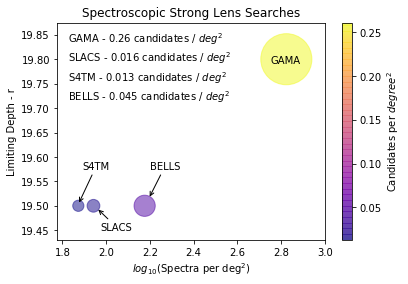

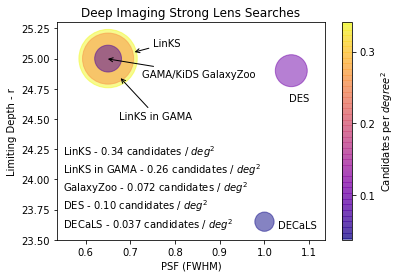

In [49]:
spectroscopic_surveys = pd.DataFrame({'SURVEY_NAME' : ['GAMA II', 'SLACS', 'S4TM', 'BELLS'],
                                     'PARENT_SURVEY' : ['GAMA', 'SDSS-DR6 MAIN and SDSS-LRG', 'SDSS-DR7', 'BOSS (SDSS-III)'],
                                      # 9380 is SDSS DR7
                                     'AREA_deg2' : [180, 8000, 9380, 1000],
                                     # 19.5 is with the nonsense.. 17.7 truly
                                     'DEPTH_r' : [19.8, 19.5, 19.5, 19.5],
                                      # GAMA equatorial from MagPhys.. I don't know how to find the others...
                                      # SDSS 700000
                                      'FIBRES' : [120114, 700000, 700000, 1500000],
                                      'SPEC_PER_SQDEG' : [667, 87.5, 74.6, 150],
                                     'CANDIDATES' : [47, 131, 118, 45],
                                     'CANDIDATES_PER_SQDEG' : [0.2611, # 47/180
                                                               0.016375, #131/8000
                                                               0.01258, #118/9380
                                                               0.04500]}, #45/10000]},
                                    )#index = [1,2,3,4])

imaging_surveys = pd.DataFrame({'SURVEY_NAME' : ['LinKS','LinKS - GAMA', 'GAMA_KiDS_GZ', 'DES', 'DECALS'],
                                     'PARENT_SURVEY' : ['KiDS DR4', 'KiDS DR4', 'KiDS', 'DES', 'DESI Legacy Imagine Surveys'],
                                'AREA_deg2' : [904, 180, 180, 5000, 9000],
                                     'DEPTH_r' : [25, 25, 25, 24.9, 23.65], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                     'PSF_PWHM' : [0.65, 0.65, 0.65, 1.06, 1.0], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                'CANDIDATES' : [308, 47, 13, 511, 335],
                                     'CANDIDATES_PER_SQDEG' : [0.3407, #308/908
                                                               0.2611, #47/180, 
                                                               0.0722, #13/180,
                                                               0.1022, #511/5000, 
                                                               0.03722 ]},#335/9000]},
                              )#index = [1,2,3,4,5])

# separate into individual surveys for plotting
# this was all poorly done...
GAMA = spectroscopic_surveys.iloc[0]
SLACS = spectroscopic_surveys.iloc[1]
S4TM = spectroscopic_surveys.iloc[2]
BELLS = spectroscopic_surveys.iloc[3]

LinKS = imaging_surveys.iloc[0]
LinKS_GAMA = imaging_surveys.iloc[1]
GalaxyZoo = imaging_surveys.iloc[2]
DES = imaging_surveys.iloc[3]
DECaLS = imaging_surveys.iloc[4]

# spectroscopic surveys

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1.775, 3.0)
ax.set_ylim(19.43, 19.875)

x = np.log10(spectroscopic_surveys.SPEC_PER_SQDEG)
y = spectroscopic_surveys.DEPTH_r
c = spectroscopic_surveys.CANDIDATES_PER_SQDEG
v = spectroscopic_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, s=v, c=c, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, 
                        shrink=1, 
                        orientation='vertical',
                        ticks=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4], 
                        spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("$log_{10}$(Spectra per deg$^2$)")
plt.ylabel("Limiting Depth - r")
plt.title("Spectroscopic Strong Lens Searches")
#plt.legend()
plt.text(2.75, 19.7925, "GAMA")
#plt.text(1.8, 19.53, "SLACS")
#plt.text(2.05, 19.53, "S4TM")
#plt.text(1.85, 19.45, "BELLS")

plt.text(1.825, 19.835, 'GAMA - 0.26 candidates / $deg^{2}$')
plt.text(1.825, 19.795, 'SLACS - 0.016 candidates / $deg^{2}$')
plt.text(1.825, 19.755, 'S4TM - 0.013 candidates / $deg^{2}$')
plt.text(1.825, 19.715, 'BELLS - 0.045 candidates / $deg^{2}$')


ax.annotate("BELLS",
            xy=(2.195,19.515), xycoords='data',
            xytext=(2.2,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("SLACS",
            xy=(1.9575,19.495), xycoords='data',
            xytext=(1.975,19.45), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("S4TM",
            xy=(1.8725,19.503), xycoords='data',
            xytext=(1.8925,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/spectroscopy_surveys_plot_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.png')

plt.show()

# imaging surveys

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(0.7, 1.2)
ax.set_ylim(23.5, 25.3)

x = imaging_surveys.PSF_PWHM
y = imaging_surveys.DEPTH_r
c = imaging_surveys.CANDIDATES_PER_SQDEG
v = imaging_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, c=c, s=v, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.1,0.2,0.3,0.4], spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("PSF (FWHM)")
plt.ylabel("Limiting Depth - r")
plt.title("Deep Imaging Strong Lens Searches")
#plt.legend()

plt.text(1.055, 24.65, "DES")
plt.text(1.03, 23.6, "DECaLS")

ax.annotate("GAMA/KiDS GalaxyZoo",
            xy=(0.645,25.0), xycoords='data',
            xytext=(0.725,24.85), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS in GAMA",
            xy=(0.675,24.85), xycoords='data',
            xytext=(0.675,24.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS",
            xy=(0.705,25.05), xycoords='data',
            xytext=(0.75,25.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.text(0.55, 24.2, 'LinKS - 0.34 candidates / $deg^{2}$')
plt.text(0.55, 24.05, 'LinKS in GAMA - 0.26 candidates / $deg^{2}$')
plt.text(0.55, 23.9, 'GalaxyZoo - 0.072 candidates / $deg^{2}$')
plt.text(0.55, 23.75, 'DES - 0.10 candidates / $deg^{2}$')
plt.text(0.55, 23.6, 'DECaLS - 0.037 candidates / $deg^{2}$')


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/imaging_surveys_060920.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/imaging_surveys.png')
#plt.savefig(f'{pdf_path}imaging_surveys.pdf')

plt.show()

In [50]:
zoo.GAMA_ID

0     485873
1      84050
2      55245
3      70282
4     185451
5     124486
6     593852
7      93310
8     136604
9     600421
10    574423
11    324764
12    342699
Name: GAMA_ID, dtype: int64

Text(0.5, 1.0, 'Einstein Radius Estimates - Point Mass vs SIS')

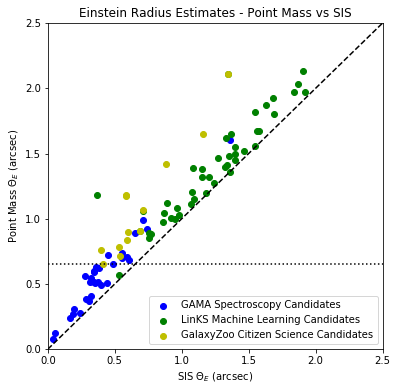

In [93]:
 # plot stellar mass by sfh for lambdar and magphys
x = np.linspace(0, 12, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.theta_e_sis,
            spec.theta_e_pm,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.theta_e_sis,
            mac.theta_e_pm,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.theta_e_sis,
            zoo.theta_e_pm,
           label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('SIS $\Theta_E$ (arcsec)')
ax.set_ylabel('Point Mass $\Theta_E$ (arcsec)')
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 2.5)
ax.plot(x, x, 
        color='k',
       linestyle='--')
ax.axhline(0.65,
        linestyle = ':',
          color='k')
ax.legend()
plt.title('Einstein Radius Estimates - Point Mass vs SIS')

#plt.savefig(f'{pdf_path}/theta_e_point_mass_vs_sis.pdf')

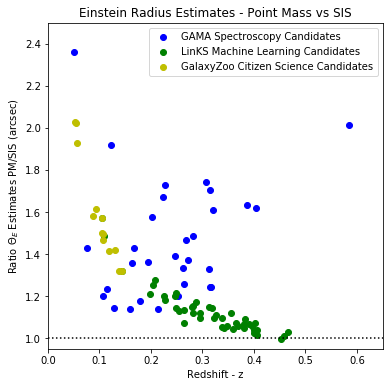

In [132]:
 # plot stellar mass by sfh for lambdar and magphys
x = np.linspace(0, 0.65, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.z_lens, spec.theta_e_pm/spec.theta_e_sis,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.z, mac.theta_e_pm/mac.theta_e_sis,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.z, zoo.theta_e_pm/zoo.theta_e_sis,
            label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_ylabel('Ratio $\Theta_E$ Estimates PM/SIS (arcsec)')
ax.set_xlabel('Redshift - z')
ax.set_ylim(0.95, 2.5)
ax.set_xlim(0, 0.65)

ax.axhline(1.0,
        linestyle = ':',
          color='k')


ax.legend()
plt.title('Einstein Radius Estimates - Point Mass vs SIS')

#plt.savefig(f'{pdf_path}/theta_e_ratio_redshift.pdf')

In [110]:
mac.columns

Index(['Unnamed: 0', 'GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm', 'theta_e_sis'],
      dtype='object')

In [147]:
zoo[['theta_e_pm','theta_e_sis']]

,theta_e_pm,theta_e_sis
0,1.177309,0.582145
1,0.837356,0.592336
2,1.421796,0.881111
3,0.782862,0.533221
4,1.063533,0.712035
5,0.909231,0.689826
6,1.646598,1.160170
7,0.714242,0.541179
8,2.111555,1.344563
9,0.763958,0.396198
